In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
    
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import random
np.random.seed(0)

# Clustering

## K-means

In [7]:
def get_Ncounts(y_predict, y_true, k, j=None):
    #N is the total number of samples
    N = X.shape[0]
    #Nk is the total number of samples in cluster k
    Nk_mask = y_predict==k
    Nk = Nk_mask.sum()
    Nj, Nkj = None, None
    #if we have a label
    if j is not None:
        Nj_mask = y_true==j
        Nj = Nj_mask.sum()
        #samples that are both in cluster k and with label j
        Nkj = np.logical_and(Nk_mask, Nj_mask).sum()
    return N, Nk, Nj, Nkj

##computing precision
def precision(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nk + 1e-8)

#computing recall
def recall(y_predict, y_true, k, j):
    N, Nk, Nj, Nkj = get_Ncounts(y_predict, y_true, k, j)
    return Nkj / (Nj + 1e-8)

#computing F1
def F(y_predict, y_true, k, j):
    p = precision(y_predict, y_true, k, j)
    r = recall(y_predict, y_true, k, j)
    return (2*p*r) / (p+r)

#computing purity
def purity(y_predict, y_true, k):
    cls = np.unique(y_true)
    prec = [precision(y_predict, y_true, k, j) for j in cls]
    return max(prec)

def tot_purity(y_predict, y_true):
    N = y_true.shape[0]
    nc = len(np.unique(y_true))
    p = 0
    for k in range(nc):
        N, Nk, _, _ = get_Ncounts(y_predict, y_true, k)
        pk = purity(y_predict, y_true, k)
        p += (Nk / N) * pk
    return p

C:\Users\comin\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans purity 0.5758971406571254
Shape of X before reshaping: (10422, 63)
Number of labels: 10422
Shape of X after reshaping: (10422, 63)
Shape of X after PCA: (10422, 3)
Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10]
Numeric labels: [ 6  2 10 ...  5  3  3]


<IPython.core.display.Javascript object>


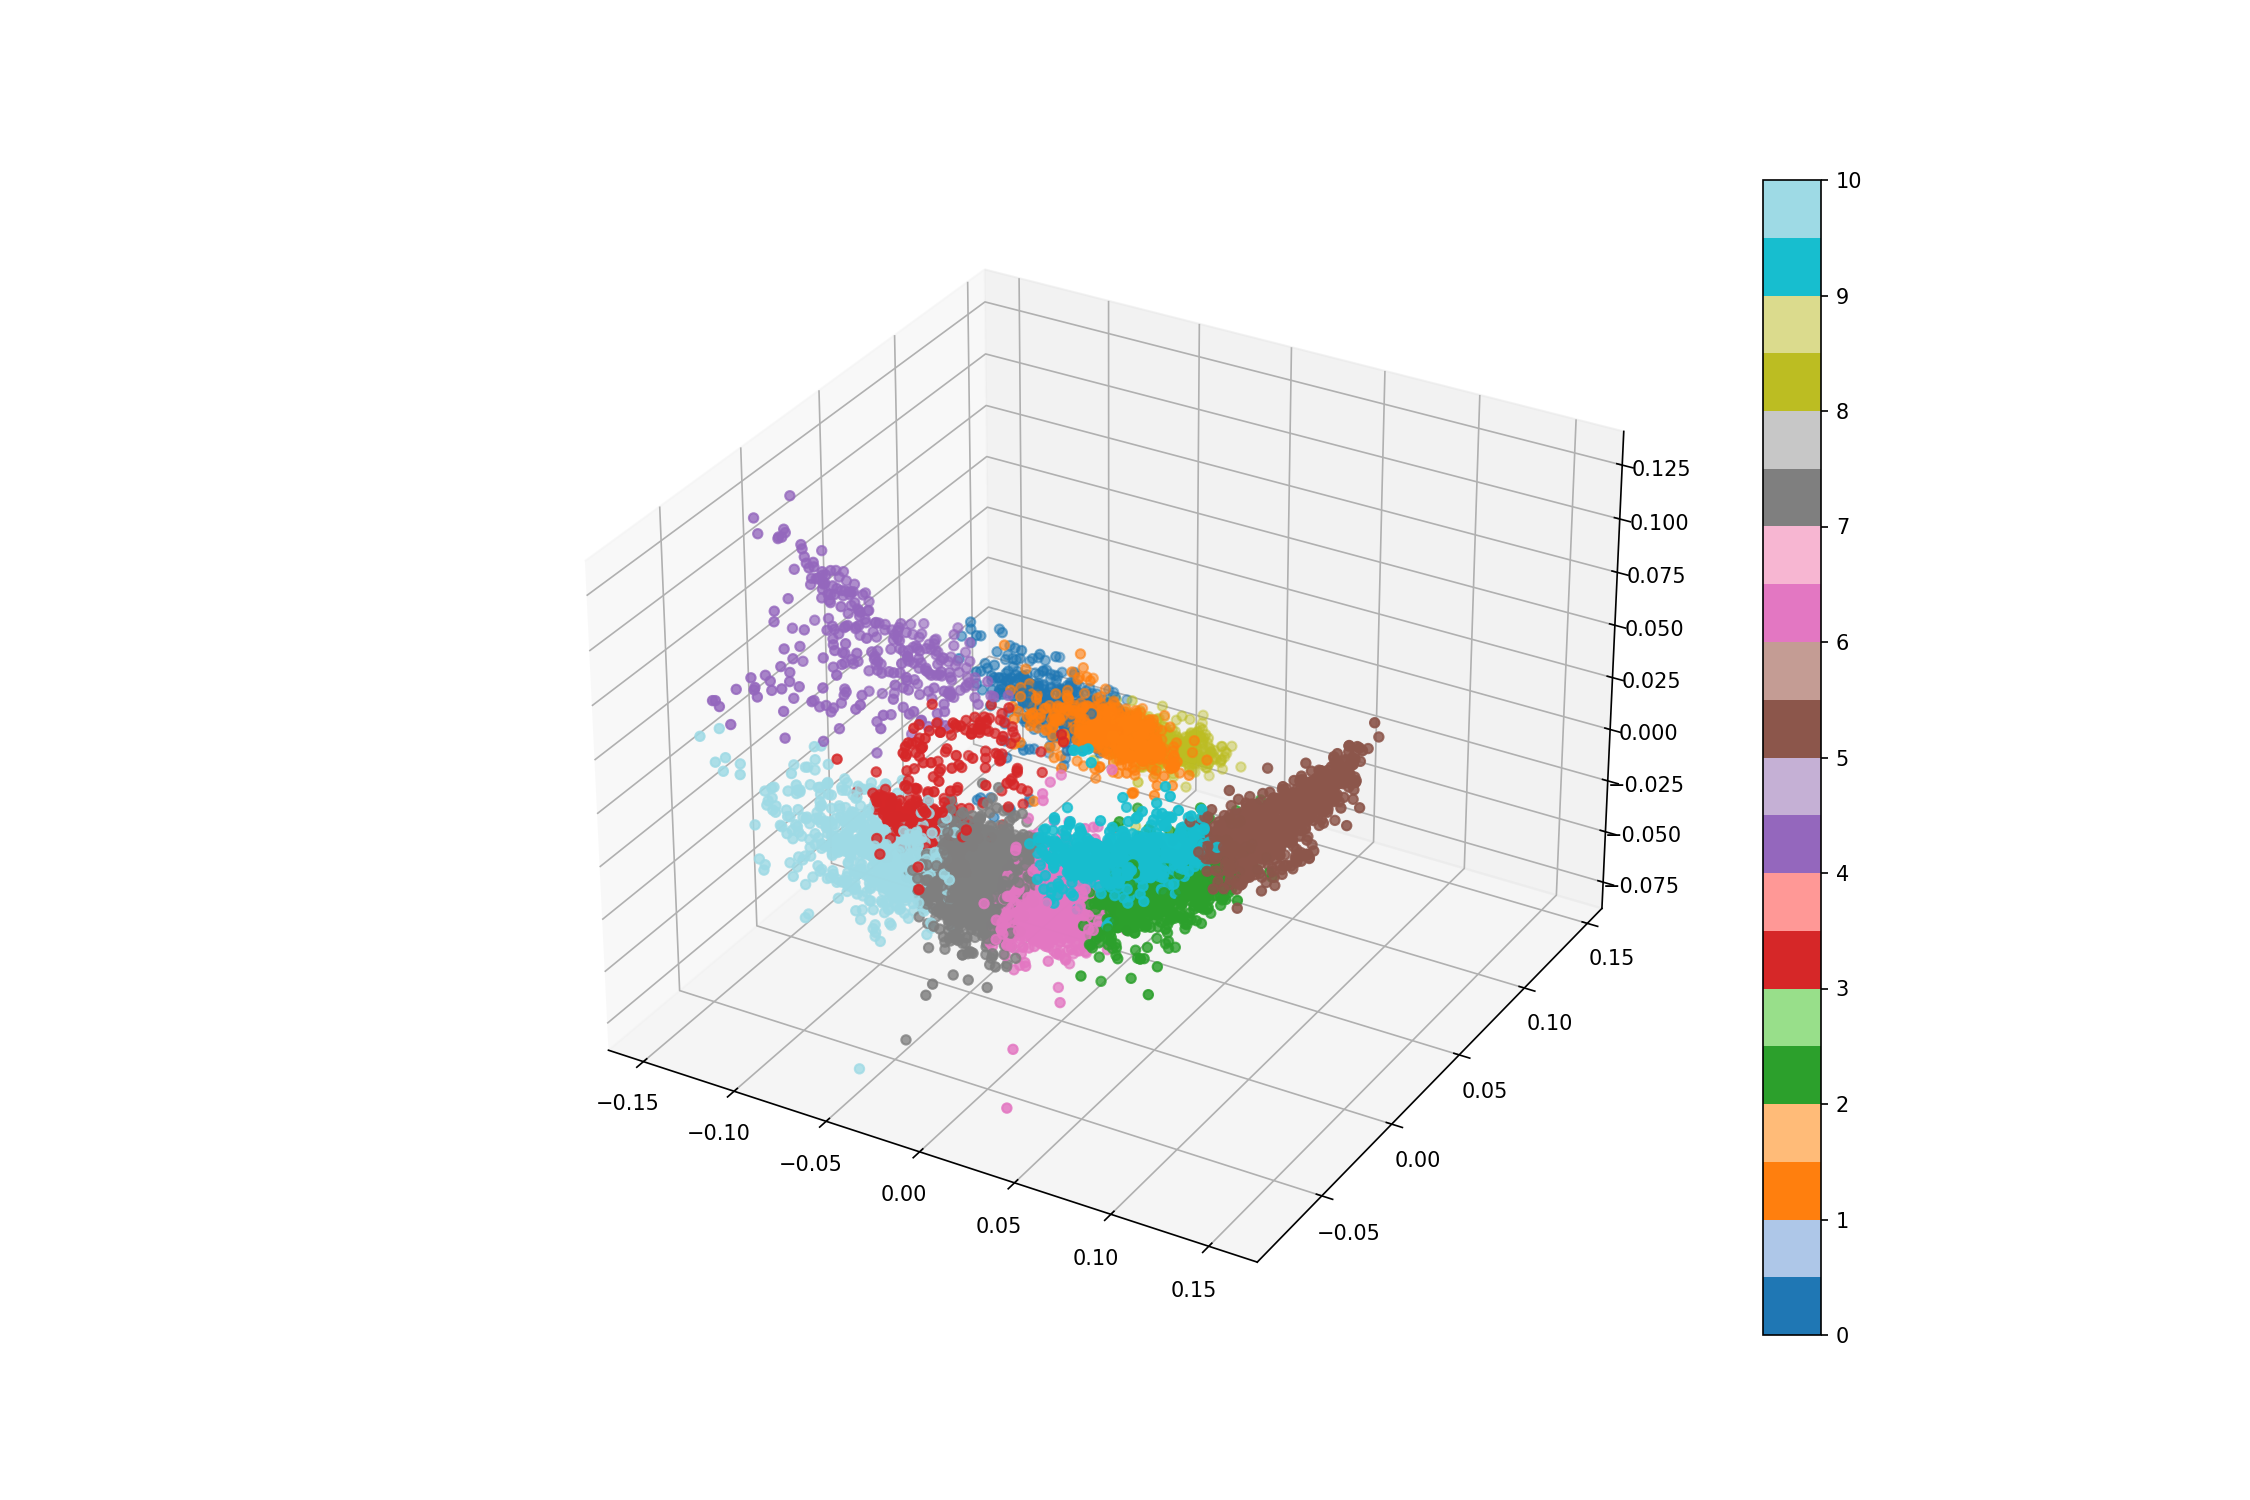

C:\Users\comin\AppData\Local\Temp\ipykernel_23536\3354104670.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(col)


In [10]:
from sklearn.cluster import KMeans

X = training.iloc[:, 5:].drop("AGA", axis=1).to_numpy()
y = training.loc[:, "Kingdom"]

model = KMeans(n_clusters=11, init='random', random_state=0)             
y_predict = model.fit_predict(X)
print("Kmeans purity", tot_purity(y_predict, y))

plot3d(X, labels=y_predict)

## DBSCAN

DBSCAN purity 0.22414123968506605
Number of outliers 0
       0
0  10422
Shape of X before reshaping: (10422, 63)
Number of labels: 10422
Shape of X after reshaping: (10422, 63)
Shape of X after PCA: (10422, 3)
Unique labels: [0]
Numeric labels: [0 0 0 ... 0 0 0]


<IPython.core.display.Javascript object>


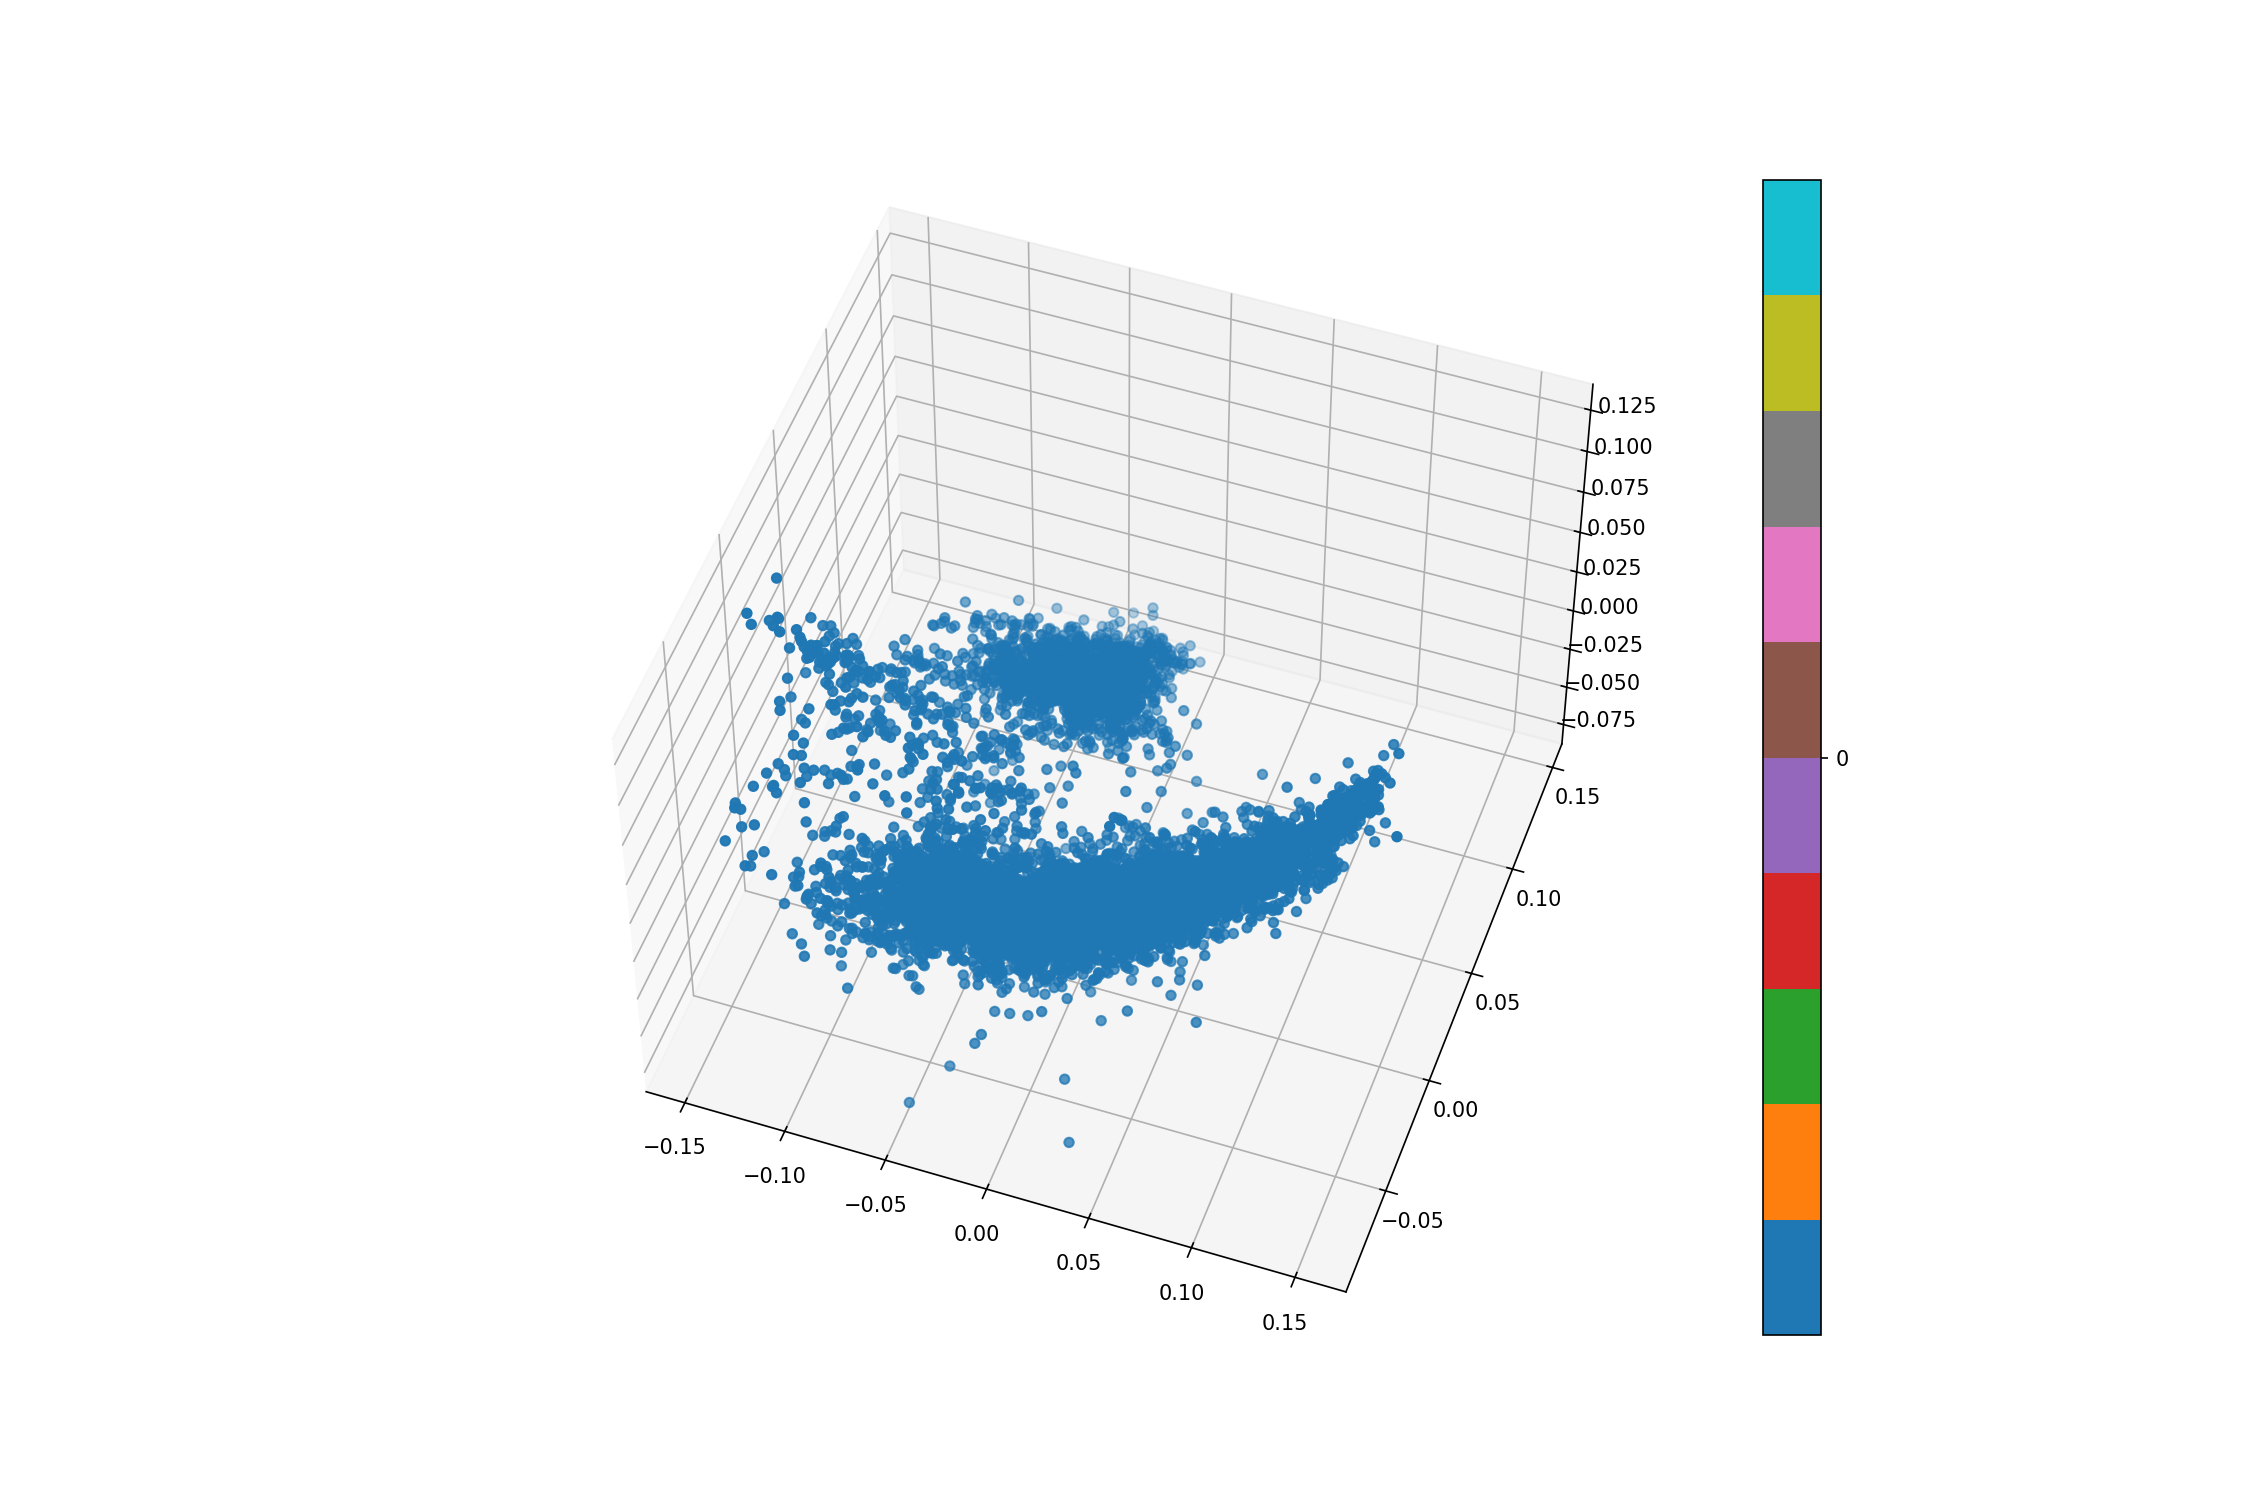

C:\Users\comin\AppData\Local\Temp\ipykernel_23536\3354104670.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(col)


In [11]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

model = DBSCAN(eps=20, min_samples=10)
y_predict = model.fit_predict(X)
print("DBSCAN purity", tot_purity(y_predict, y))

print("Number of outliers", (y_predict == -1).sum())
ids, counts = np.unique(y_predict, return_counts=True)
print(pd.DataFrame(counts.reshape(1, -1), columns=ids))

plot3d(X, labels=y_predict)

In [12]:
def make_scorer(metric):
    def scorer(estimator, X, y):
        y_pred = estimator.fit_predict(X)
        return metric(y_pred, y)
    return scorer

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'eps': range(15,20), 'min_samples': range(1,5)}
cv = GridSearchCV(model, params, scoring=make_scorer(tot_purity), cv=3)
cv = cv.fit(X, y)

In [ ]:
print(cv.best_params_)
print("CV score", tot_purity(cv.best_estimator_.fit_predict(X), y))

pd.DataFrame(cv.cv_results_)

### WIth the best parameters found with CV:

DBSCAN purity 0.22414123968506605
Number of outliers 0
       0
0  10422
Shape of X before reshaping: (10422, 63)
Number of labels: 10422
Shape of X after reshaping: (10422, 63)
Shape of X after PCA: (10422, 3)
Unique labels: [0]
Numeric labels: [0 0 0 ... 0 0 0]


<IPython.core.display.Javascript object>


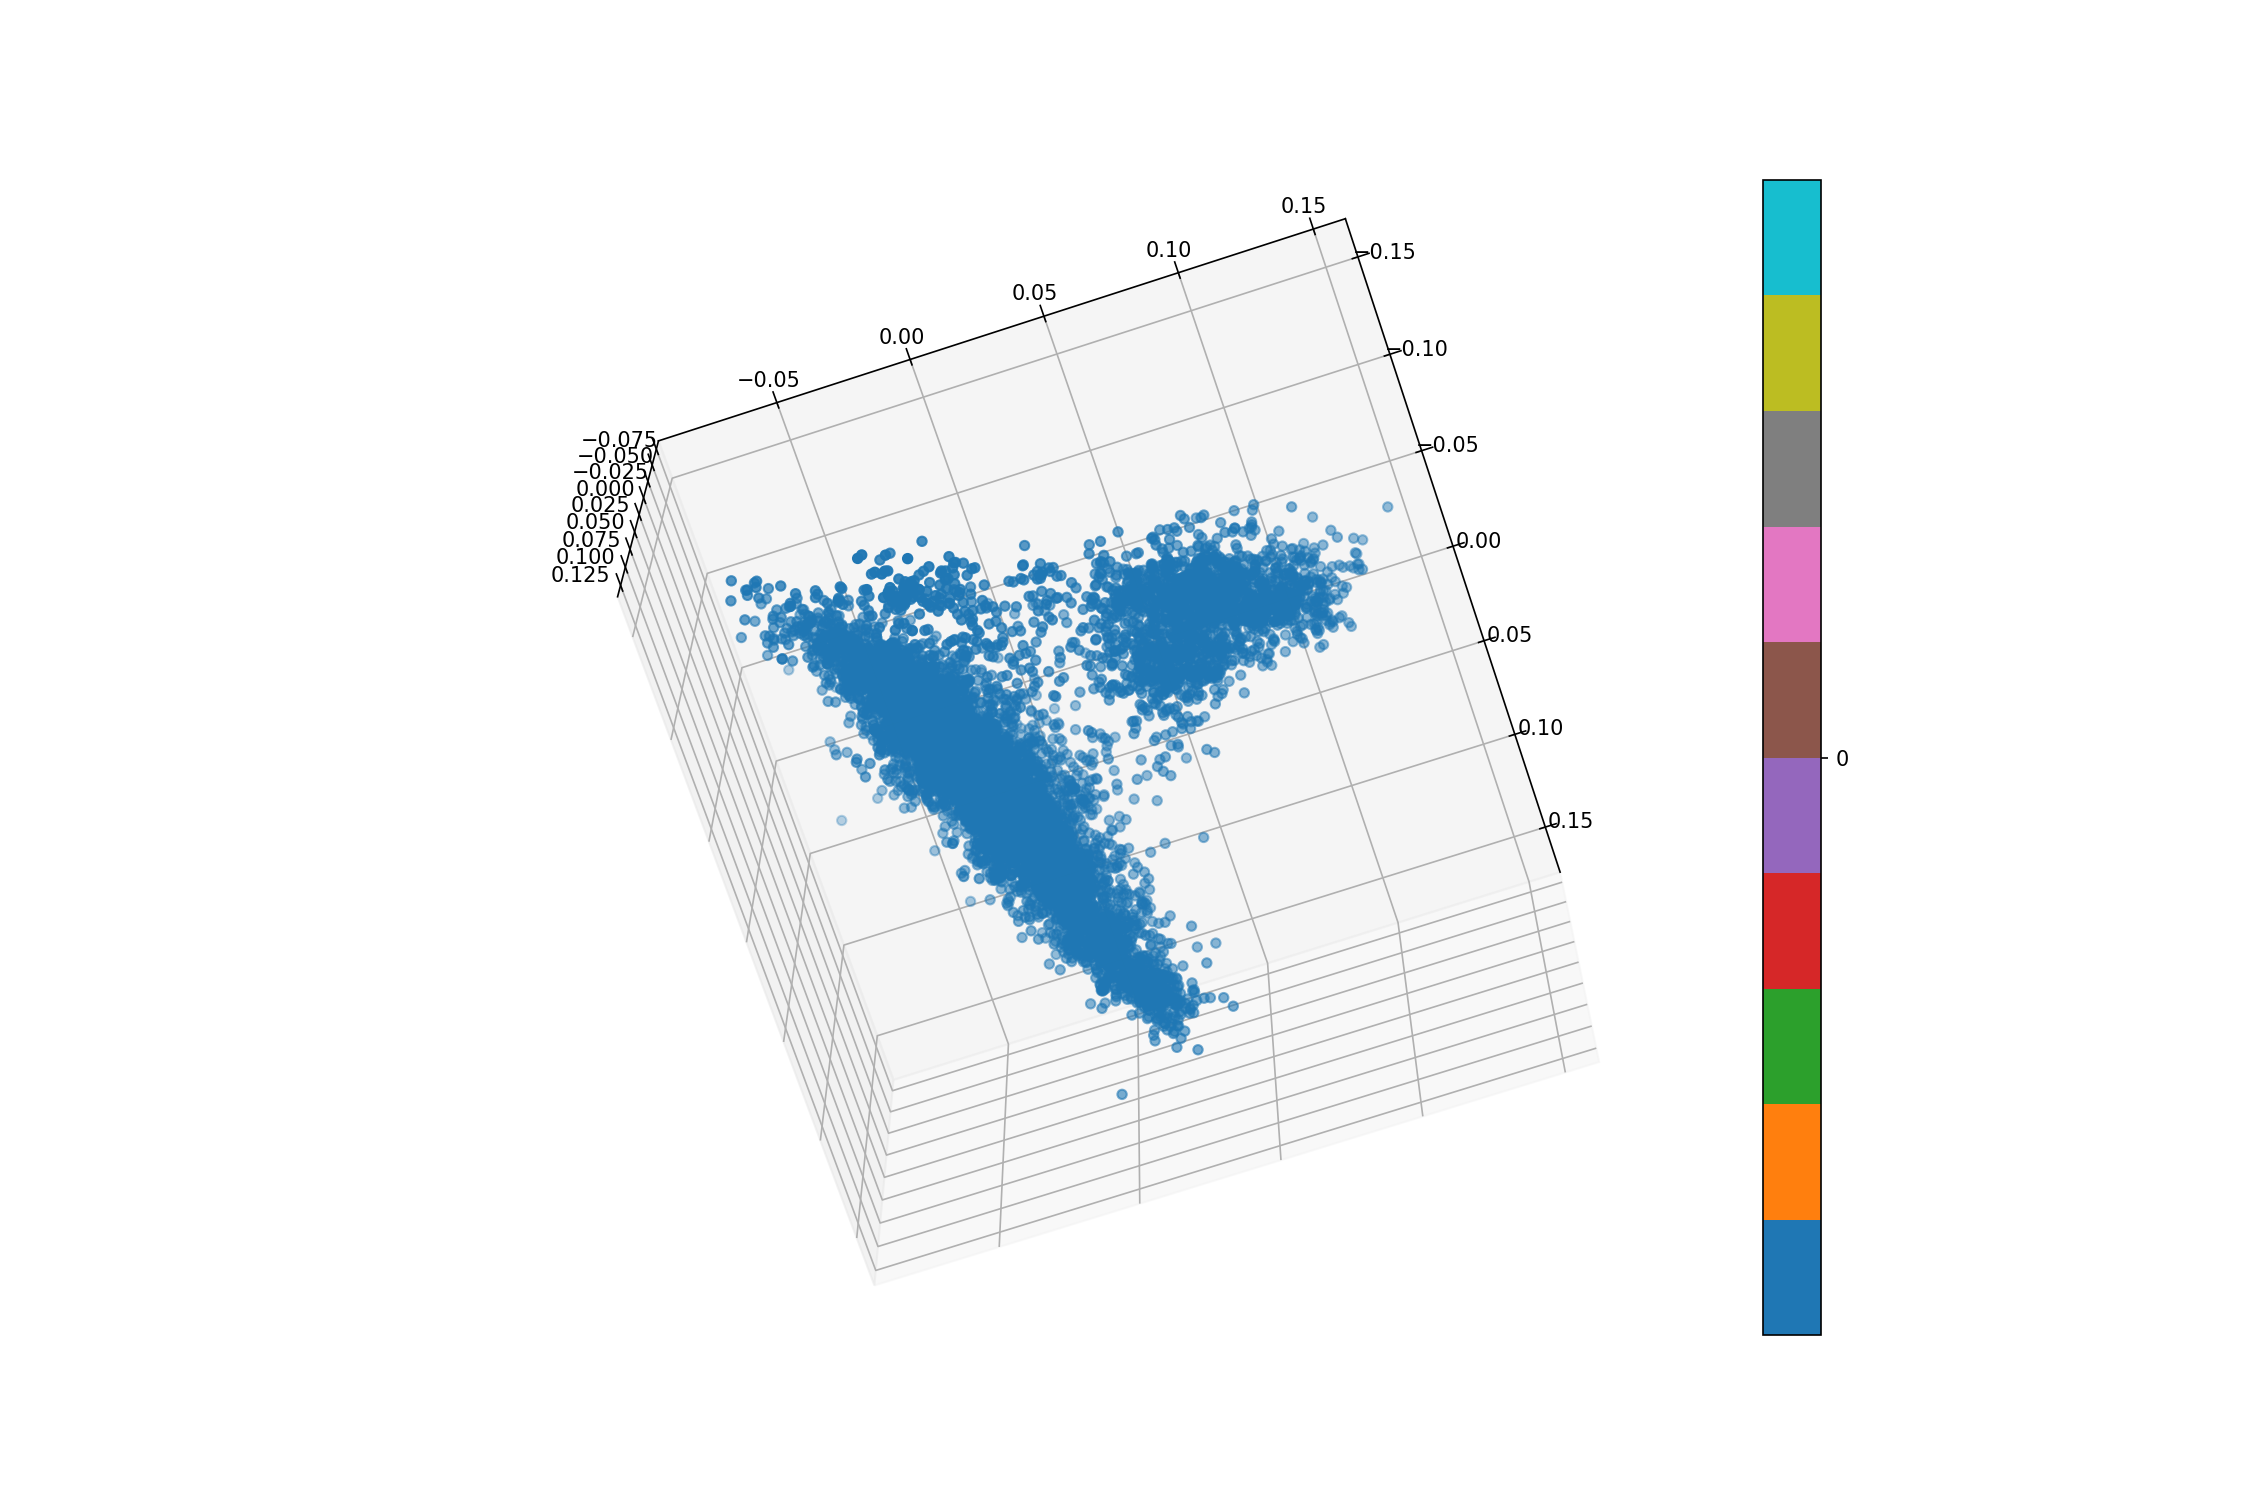

C:\Users\comin\AppData\Local\Temp\ipykernel_23536\3354104670.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(col)


In [15]:
model = DBSCAN(eps=20, min_samples=5)
y_predict = model.fit_predict(X)
print("DBSCAN purity", tot_purity(y_predict, y))

print("Number of outliers", (y_predict == -1).sum())
ids, counts = np.unique(y_predict, return_counts=True)
print(pd.DataFrame(counts.reshape(1, -1), columns=ids))

plot3d(X, labels=y_predict)

# PCA

In [2]:
training = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
training = training.iloc[:, 1:]
test = test.iloc[:, 1:]

In [3]:
from sklearn.decomposition import PCA

# Define PCA with 3 components, this will transform 
pca = PCA(n_components=3)

X_prj = pca.fit_transform(training.iloc[:, 5:].drop("AGA", axis = 1))

X_prj.shape
# Why not normalize to mean = 0?
# For visualization we don't need to do it.
# I can try to normalize and see what happen.

(10422, 3)

Shape of X before passing to plot3d: (10422, 63)
Number of labels: 10422
Shape of X before reshaping: (10422, 63)
Number of labels: 10422
Shape of X after reshaping: (10422, 63)
Shape of X after PCA: (10422, 3)
Unique labels: ['arc' 'bct' 'inv' 'mam' 'phg' 'plm' 'pln' 'pri' 'rod' 'vrl' 'vrt']
Numeric labels: [9 2 1 ... 1 6 6]


<IPython.core.display.Javascript object>


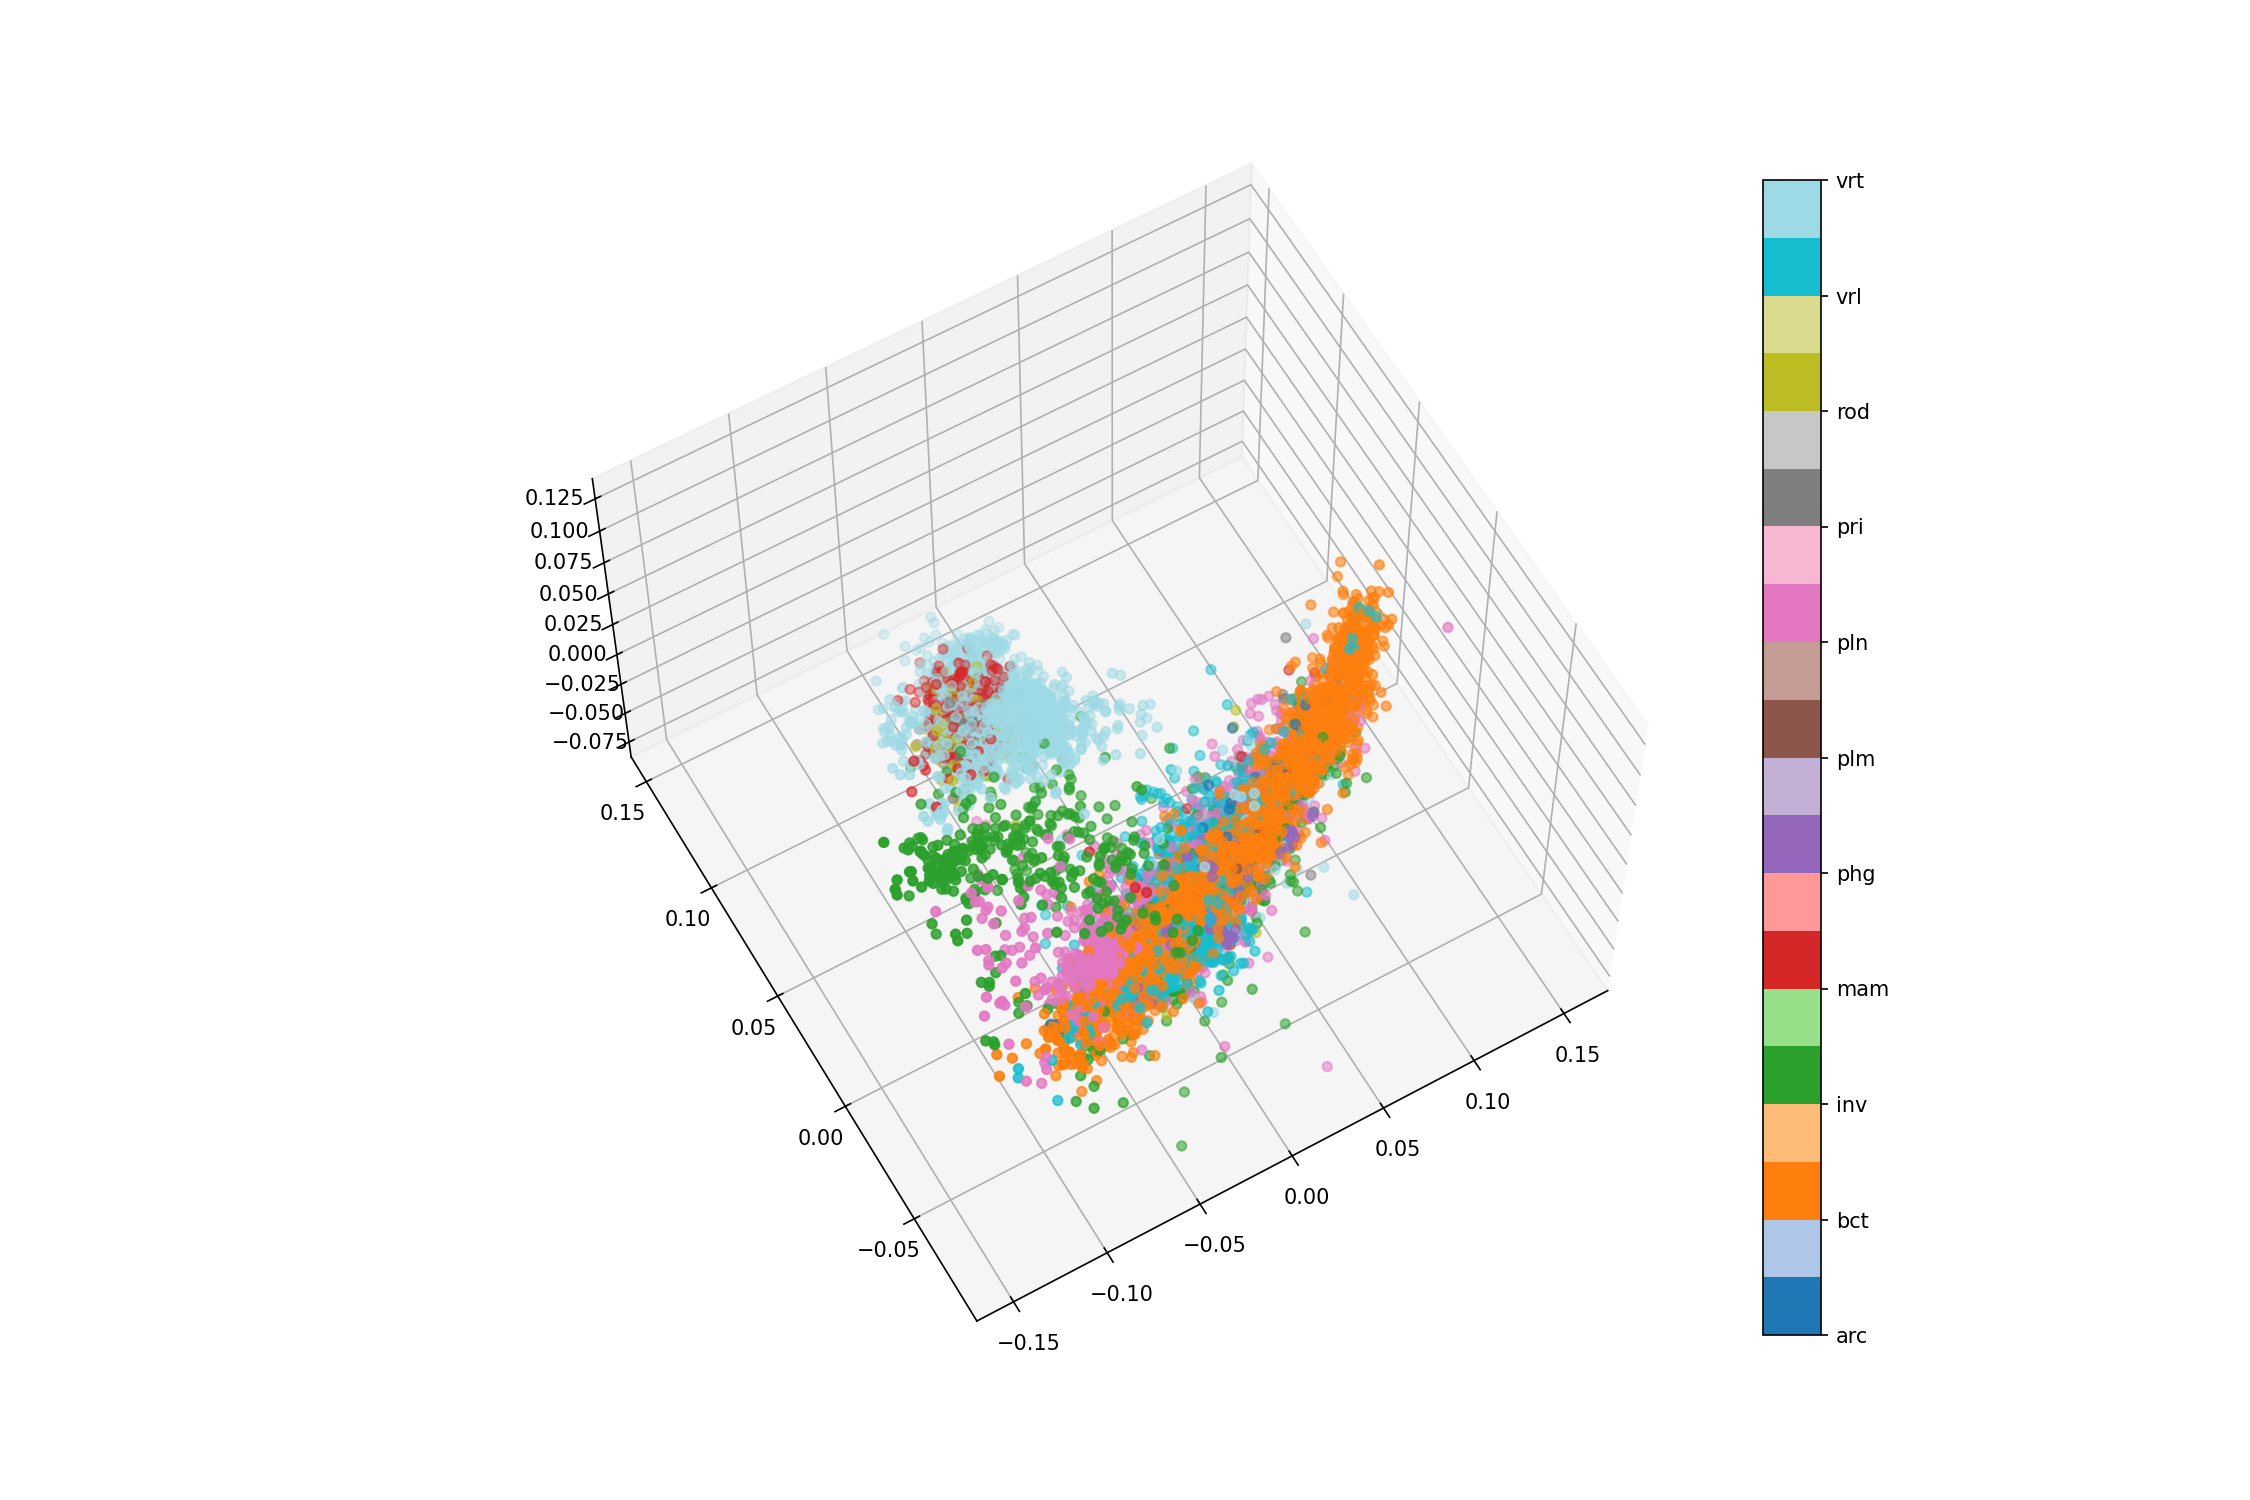

C:\Users\comin\AppData\Local\Temp\ipykernel_23536\3354104670.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(col)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
from sklearn.decomposition import PCA

def plot3d(X, labels):
    %matplotlib notebook
    from mpl_toolkits.mplot3d import Axes3D
    
    # Check the shape of X and labels before proceeding
    print(f"Shape of X before reshaping: {X.shape}")
    print(f"Number of labels: {len(labels)}")
    
    # Ensure X is reshaped correctly
    X = X.reshape(X.shape[0], -1)
    print(f"Shape of X after reshaping: {X.shape}")
    
    # Reduce features dimensionality for visualization purposes
    pca = PCA(n_components=3)
    X = pca.fit_transform(X)
    print(f"Shape of X after PCA: {X.shape}")
    
    # Convert string labels to numeric labels
    unique_labels = np.unique(labels)
    label_to_num = {label: idx for idx, label in enumerate(unique_labels)}
    numeric_labels = np.array([label_to_num[label] for label in labels])
    
    print(f"Unique labels: {unique_labels}")
    print(f"Numeric labels: {numeric_labels}")
    
    nlabels = len(unique_labels)
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define color mappings
    col = ('tab10' if nlabels <= 10 else 
           ('tab20' if nlabels <= 20 else
            'hsv'))
    cmap = plt.cm.get_cmap(col)
    
    # Plot the 3D coordinates
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=numeric_labels, cmap=cmap)
    
    # Plot a color bar on the right
    smap = cm.ScalarMappable(cmap=cmap, norm=mcolors.Normalize(vmin=numeric_labels.min(), vmax=numeric_labels.max()))
    cbar = plt.colorbar(mappable=smap, ax=ax, ticks=range(nlabels))
    cbar.ax.set_yticklabels(unique_labels)  # set string labels

    plt.show()

# Assuming 'training' is a DataFrame
# Drop "AGA" column and convert to numpy array
X = training.iloc[:, 5:].drop("AGA", axis=1).to_numpy()

# Use a single column for labels (adjust as needed)
# Assuming the label column is "Label" (change to your actual label column name)
labels = training["Kingdom"]

print(f"Shape of X before passing to plot3d: {X.shape}")
print(f"Number of labels: {len(labels)}")

# Call the plot3d function
plot3d(X, labels)


Shape of X before passing to plot3d: (10422, 63)
Number of labels: 10422
Shape of X before reshaping: (10422, 63)
Number of labels: 10422
Shape of X after reshaping: (10422, 63)
Shape of X after PCA: (10422, 3)
Unique labels: ['arc' 'bct' 'inv' 'mam' 'phg' 'plm' 'pln' 'pri' 'rod' 'vrl' 'vrt']
Numeric labels: [9 2 1 ... 1 6 6]


<IPython.core.display.Javascript object>


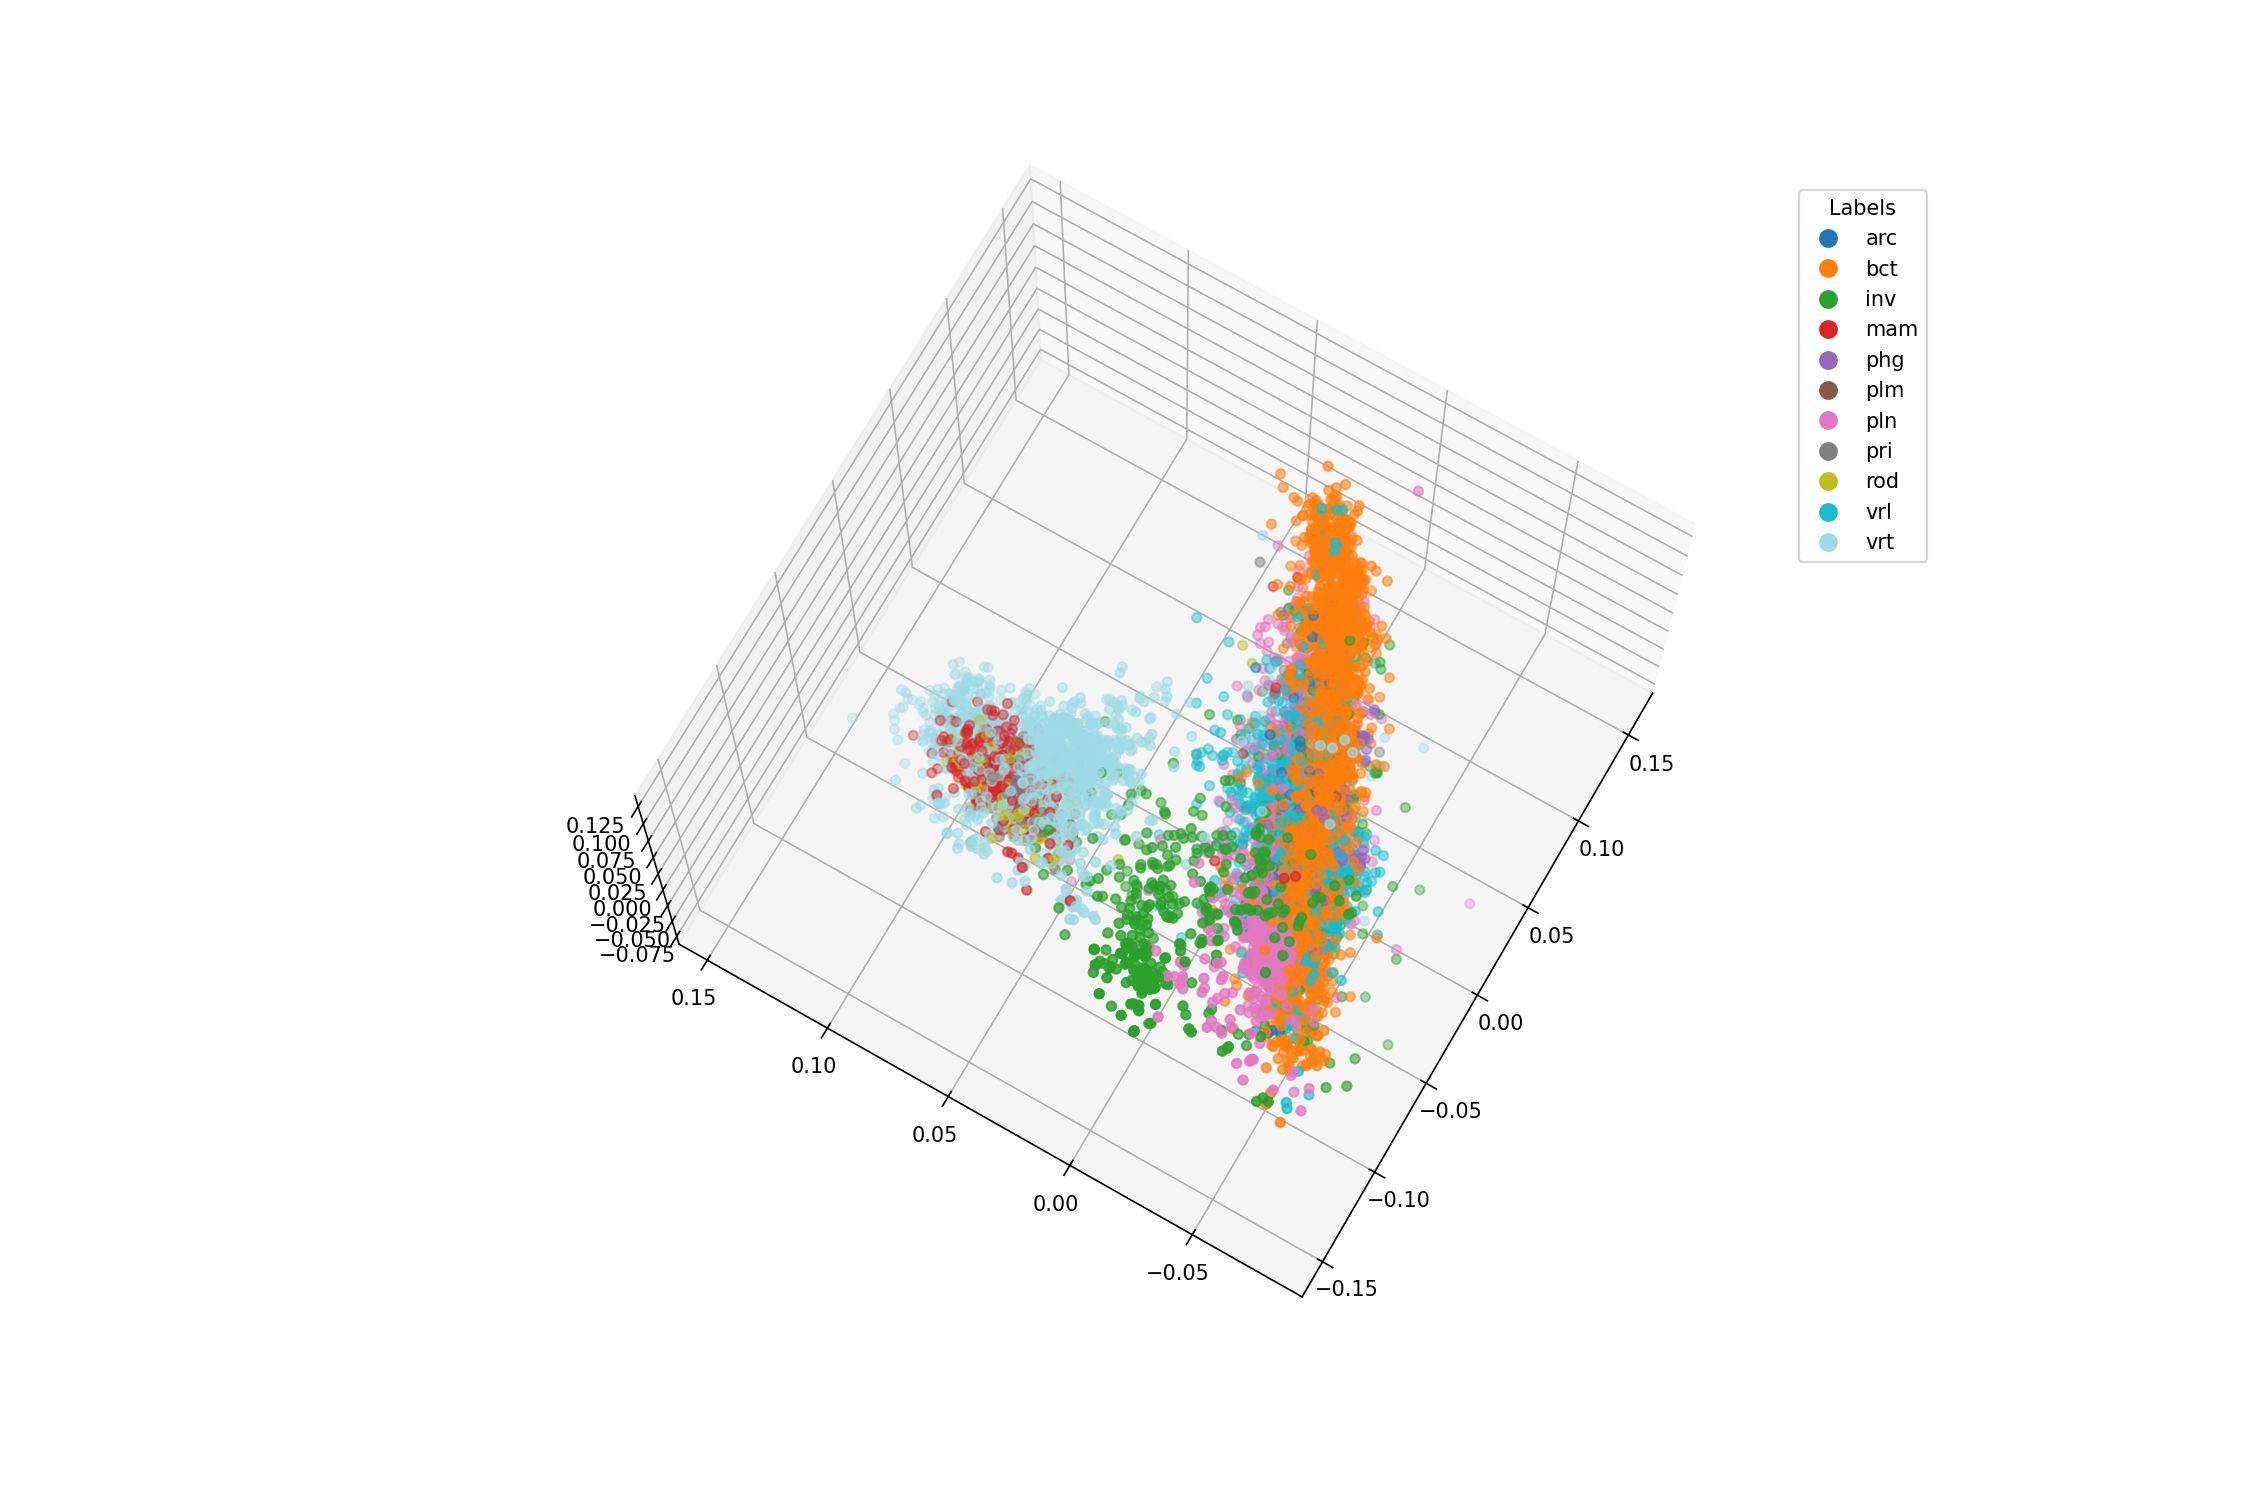

C:\Users\comin\AppData\Local\Temp\ipykernel_9436\223492279.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(col)


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.colors as mcolors
from sklearn.decomposition import PCA

def plot3d(X, labels):
    %matplotlib notebook
    from mpl_toolkits.mplot3d import Axes3D
    
    # Check the shape of X and labels before proceeding
    print(f"Shape of X before reshaping: {X.shape}")
    print(f"Number of labels: {len(labels)}")
    
    # Ensure X is reshaped correctly
    X = X.reshape(X.shape[0], -1)
    print(f"Shape of X after reshaping: {X.shape}")
    
    # Reduce features dimensionality for visualization purposes
    pca = PCA(n_components=3)
    X = pca.fit_transform(X)
    print(f"Shape of X after PCA: {X.shape}")
    
    # Convert string labels to numeric labels
    unique_labels = np.unique(labels)
    label_to_num = {label: idx for idx, label in enumerate(unique_labels)}
    numeric_labels = np.array([label_to_num[label] for label in labels])
    
    print(f"Unique labels: {unique_labels}")
    print(f"Numeric labels: {numeric_labels}")
    
    nlabels = len(unique_labels)
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define color mappings
    col = ('tab10' if nlabels <= 10 else 
           ('tab20' if nlabels <= 20 else
            'hsv'))
    cmap = plt.cm.get_cmap(col)
    
    # Plot the 3D coordinates
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=numeric_labels, cmap=cmap)
    
    # Create a legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(label_to_num[label] / (nlabels - 1)), markersize=10) for label in unique_labels]
    ax.legend(handles, unique_labels, title="Labels", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.show()

# Assuming 'training' is a DataFrame
# Drop "AGA" column and convert to numpy array
X = training.iloc[:, 5:].drop("AGA", axis=1).to_numpy()

# Use a single column for labels (adjust as needed)
# Assuming the label column is "Label" (change to your actual label column name)
labels = training["Kingdom"]

print(f"Shape of X before passing to plot3d: {X.shape}")
print(f"Number of labels: {len(labels)}")

# Call the plot3d function
plot3d(X, labels)


Shape of X before passing to plot3d: (10422, 63)
Number of labels: 10422
Shape of X before reshaping: (10422, 63)
Number of labels: 10422
Shape of X after reshaping: (10422, 63)
Shape of X after PCA: (10422, 3)
Unique labels: ['arc' 'bct' 'inv' 'mam' 'phg' 'plm' 'pln' 'pri' 'rod' 'vrl' 'vrt']
Numeric labels: [9 2 1 ... 1 6 6]


<IPython.core.display.Javascript object>


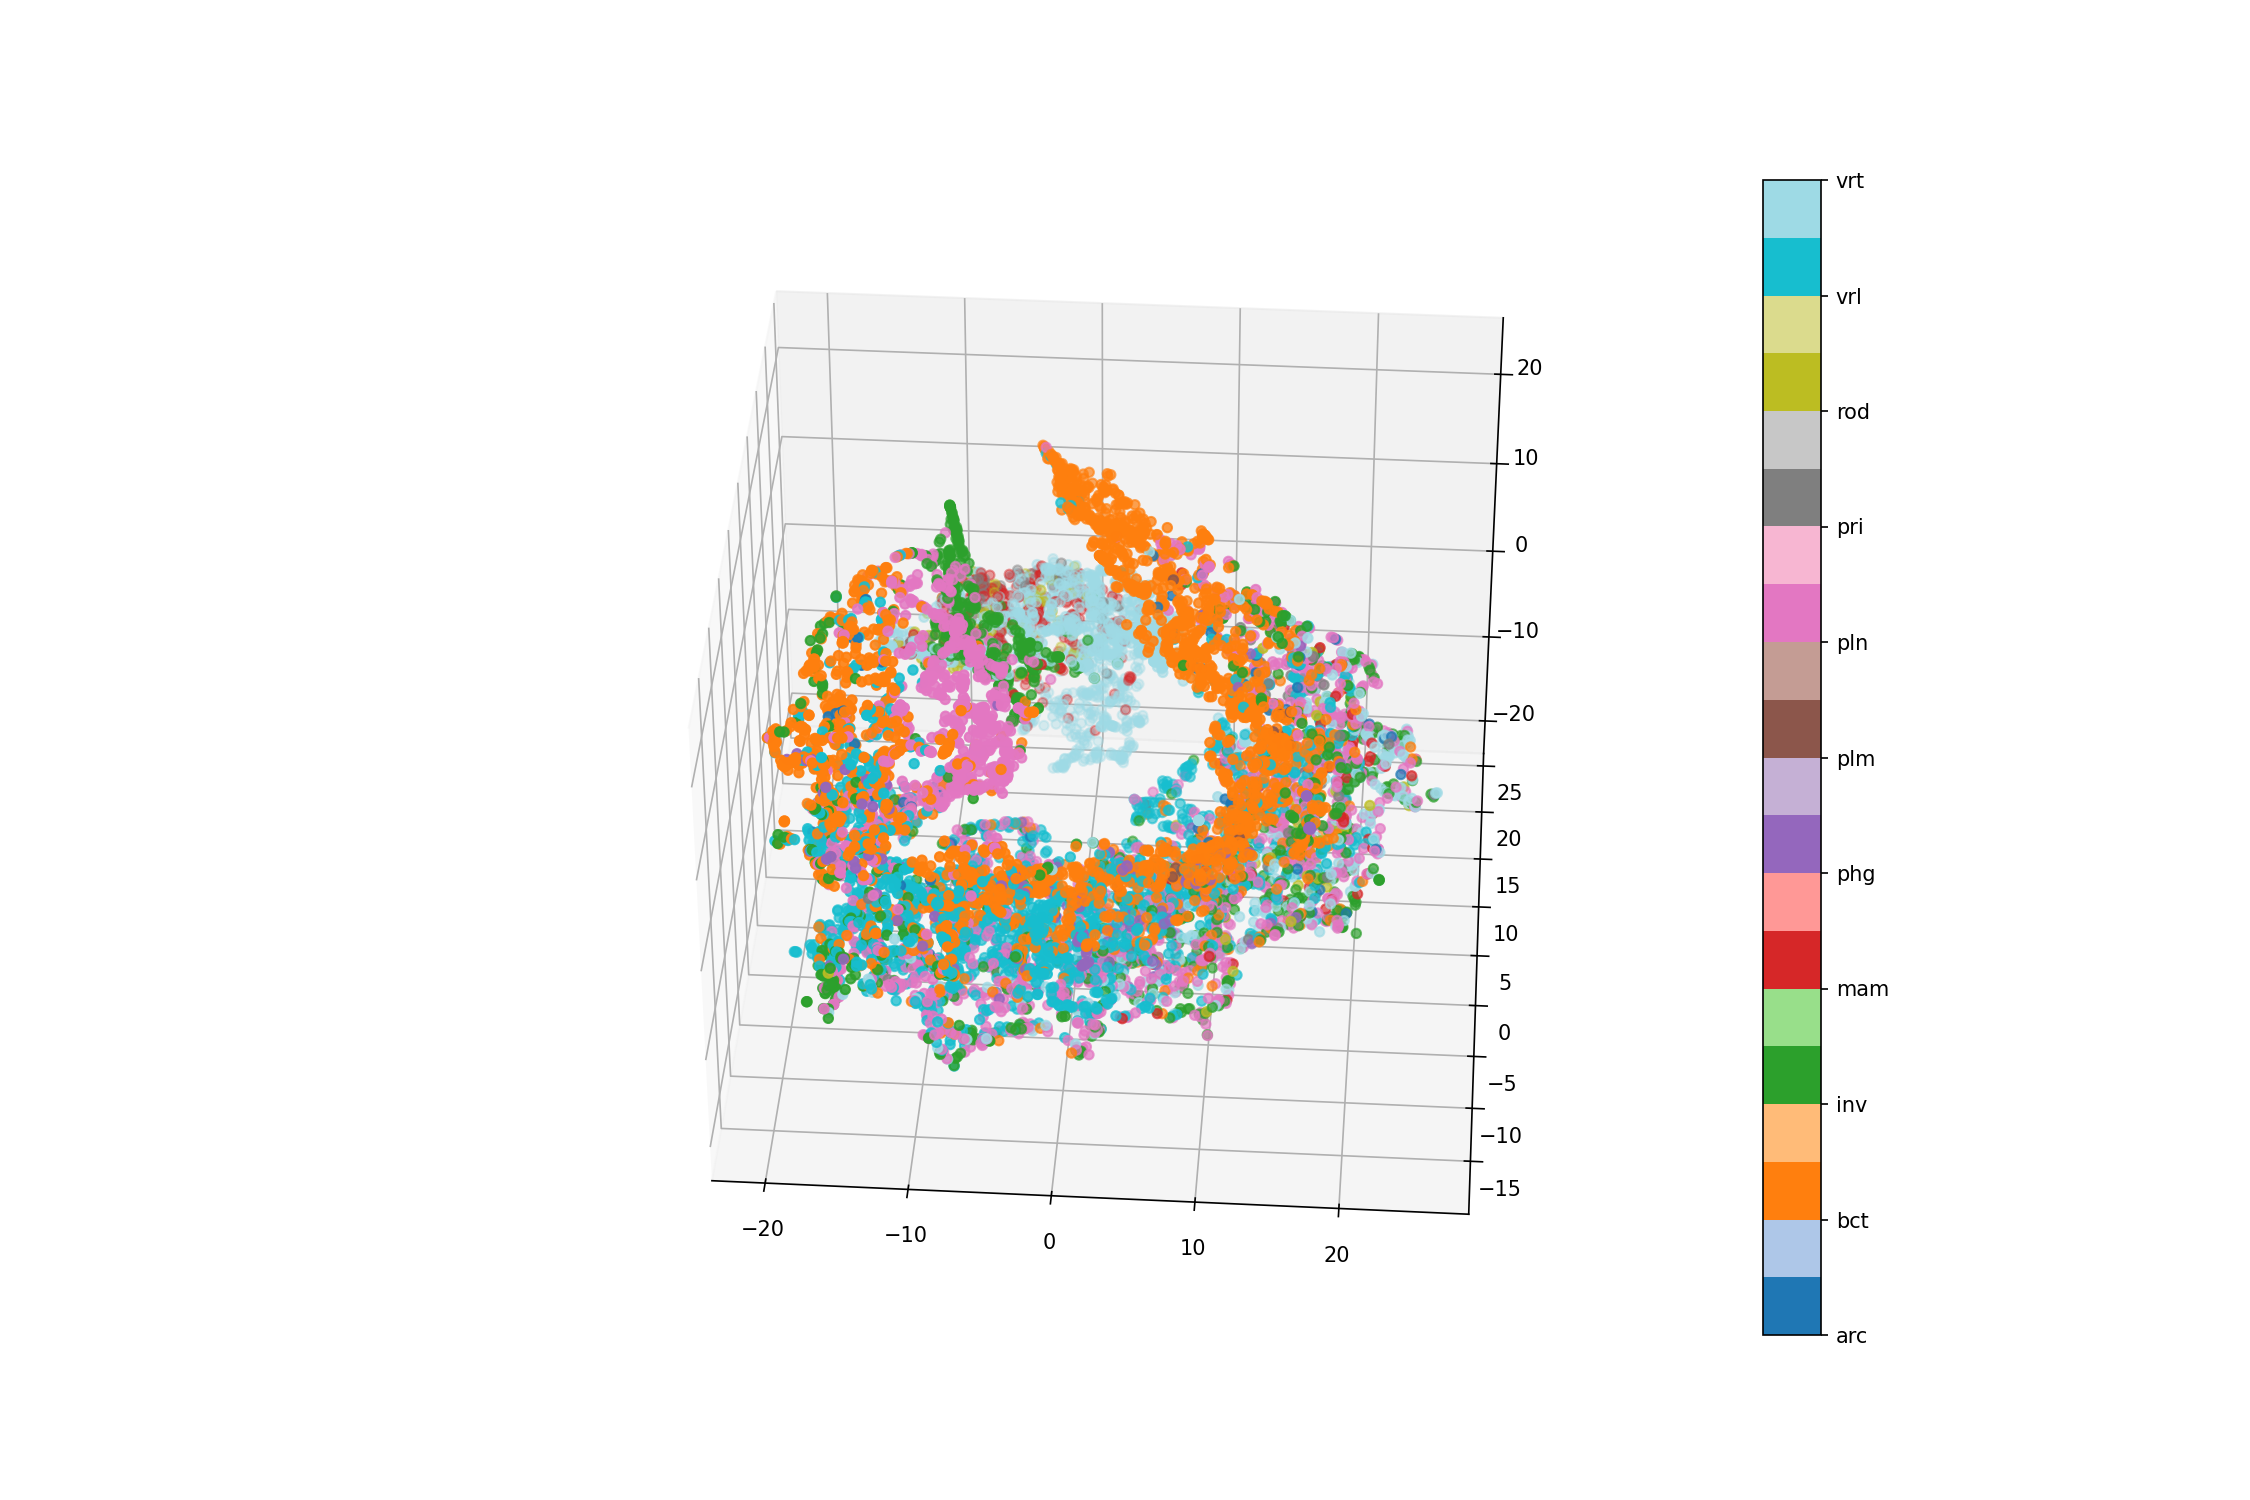

C:\Users\comin\AppData\Local\Temp\ipykernel_9436\2492851931.py:38: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap(col)


In [23]:
from sklearn.manifold import TSNE

def plot3d(X, labels):
    %matplotlib notebook
    from mpl_toolkits.mplot3d import Axes3D
    
    # Check the shape of X and labels before proceeding
    print(f"Shape of X before reshaping: {X.shape}")
    print(f"Number of labels: {len(labels)}")
    
    # Ensure X is reshaped correctly
    X = X.reshape(X.shape[0], -1)
    print(f"Shape of X after reshaping: {X.shape}")
    
    # Reduce features dimensionality for visualization purposes
    tsne = TSNE(n_components=3)
    X = pca.fit_transform(X)
    print(f"Shape of X after PCA: {X.shape}")
    X = tsne.fit_transform(X)

    # Convert string labels to numeric labels
    unique_labels = np.unique(labels)
    label_to_num = {label: idx for idx, label in enumerate(unique_labels)}
    numeric_labels = np.array([label_to_num[label] for label in labels])
    
    print(f"Unique labels: {unique_labels}")
    print(f"Numeric labels: {numeric_labels}")
    
    nlabels = len(unique_labels)
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define color mappings
    col = ('tab10' if nlabels <= 10 else 
           ('tab20' if nlabels <= 20 else
            'hsv'))
    cmap = plt.cm.get_cmap(col)
    
    # Plot the 3D coordinates
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=numeric_labels, cmap=cmap)
    
    # Plot a color bar on the right
    smap = cm.ScalarMappable(cmap=cmap, norm=mcolors.Normalize(vmin=numeric_labels.min(), vmax=numeric_labels.max()))
    cbar = plt.colorbar(mappable=smap, ax=ax, ticks=range(nlabels))
    cbar.ax.set_yticklabels(unique_labels)  # set string labels

    plt.show()

# Assuming 'training' is a DataFrame
# Drop "AGA" column and convert to numpy array
X = training.iloc[:, 5:].drop("AGA", axis=1).to_numpy()

# Use a single column for labels (adjust as needed)
# Assuming the label column is "Label" (change to your actual label column name)
labels = training["Kingdom"]

print(f"Shape of X before passing to plot3d: {X.shape}")
print(f"Number of labels: {len(labels)}")

# Call the plot3d function
plot3d(X, labels)
